In [1]:
import pandas as pd              # Pandas to work with CSV
import matplotlib.pyplot as plt  # Matplotlib to work with plots
import os                        # OS to locate the file

In [5]:
path=r'D:\Example\data' # Path to our folder
os.chdir(path)          # Change the current directory
os.listdir()            # Show the files located in the folder

['CH1--800V.csv',
 'CH2--800V.csv',
 'CH3--800V.csv',
 'CH4--800V.csv',
 'CH5--800V.csv',
 'CH6--800V.csv',
 'CH7--800V.csv']

In [9]:
filename = os.listdir()[0].split('--')[1] # assign the filename to the variable
filename

'800V.csv'

In [19]:
data = pd.read_csv(f'CH{1}--{filename}', # load the file
                   skiprows=5,           # Skip first 5 rows to start with the data
                   usecols=[0],          # Load only first column (time) since it is common for all of them
                   names=['t'])          # give it a name
data.head(3)                              # View the data

,t
0,-0.05
1,-0.05
2,-0.05


In [20]:
for i in range(1,8):
    data[f'ch{i}'] = pd.read_csv(f'CH{i}--{filename}', # load the file AGAIN
                   skiprows=5,           # Skip AGAIN first 5 rows to start with the data
                   usecols=[1]          # Load only SECOND column (time) since it is common for all of them
                   ).squeeze(True)      # squeeze means attach it to the existing table
    
data.head(5) # View the data

,t,ch1,ch2,ch3,ch4,ch5,ch6,ch7
0,-0.05,6.382420e-08,-3.42,-1.70,0.017330,-8.757030e-07,-4.99988,770.4
1,-0.05,-3.155970e-07,-3.88,-1.84,0.044979,-2.408060e-06,-3.99990,772.0
2,-0.05,-1.646100e-06,-3.90,-1.92,0.086316,-4.910980e-06,-5.39987,770.8
3,-0.05,-4.438000e-06,-3.82,-1.92,0.141216,-8.493390e-06,-4.79988,772.4
4,-0.05,-9.182100e-06,-3.14,-1.96,0.209582,-1.327360e-05,-5.59986,772.8


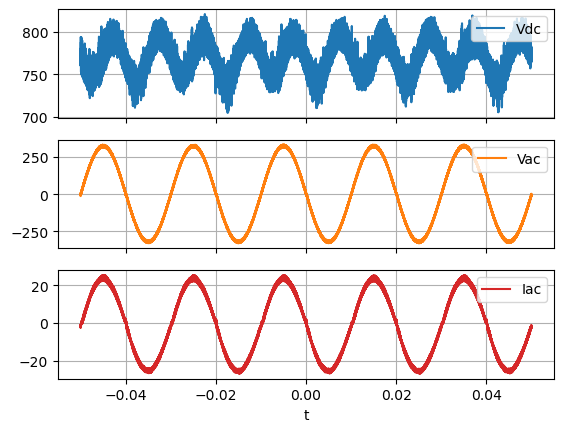

In [69]:
fig,p=plt.subplots(3,sharex=True)                                   # Create 3 subplots
data.plot(ax=p[0],x='t',y='ch7',grid=True,label='Vdc')              # Plot ch7 as 1st subplot
data.plot(ax=p[1],x='t',y='ch6',grid=True,label='Vac',color='C1')   # Plot ch4 as 2nd subplot
data.plot(ax=p[2],x='t',y='ch3',grid=True,label='Iac',color='C3')   # Plot ch3 as 3rd subplot

[ax.legend(loc='upper right') for ax in p]                          # Put the legend in right top corner

In [64]:
# Sometimes we need to access only part of the plot, instead of using xlim, it is faster to use MASK
msk = (data.t>0)&(data.t<2e-3)
data[msk].info() # We limit the dataframe to 20k points (from 1Meg), now we can plot it

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 500001 to 520000
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       20000 non-null  float64
 1   ch1     20000 non-null  float64
 2   ch2     20000 non-null  float64
 3   ch3     20000 non-null  float64
 4   ch4     20000 non-null  float64
 5   ch5     20000 non-null  float64
 6   ch6     20000 non-null  float64
 7   ch7     20000 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


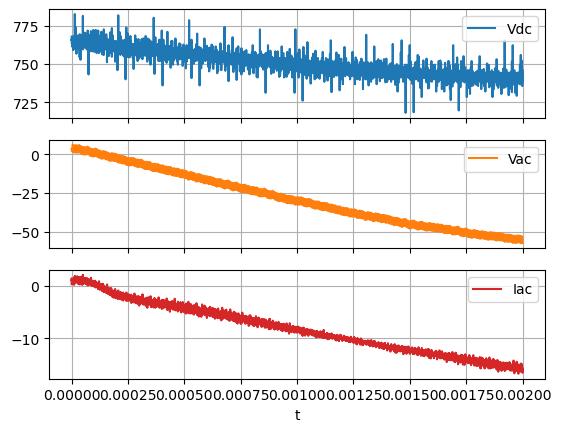

In [62]:
fig,p=plt.subplots(3,sharex=True)                                        # Create 3 subplots
data[msk].plot(ax=p[0],x='t',y='ch7',grid=True,label='Vdc')              # Plot ch7 as 1st subplot
data[msk].plot(ax=p[1],x='t',y='ch4',grid=True,label='Vac',color='C1')   # Plot ch4 as 2nd subplot
data[msk].plot(ax=p[2],x='t',y='ch3',grid=True,label='Iac',color='C3')   # Plot ch3 as 3rd subplot

[ax.legend(loc='upper right') for ax in p]                          # Put the legend in right top corner

In [63]:
# We can save all 7 channels in one file and can even pack it to ZIP
data.to_csv(filename+'.zip',index=False)





